# Catch 'Em All: Unlocking the Secrets of the Coupon Collector's Problem

## Introduction 
Have you ever found yourself engrossed in collecting items, perhaps trading cards, stickers, or even digital creatures in your favorite video game? Each new addition brings a sense of achievement, but as your collection grows, the thrill of finding that last missing piece becomes a formidable challenge. What are the odds of completing your collection without endless searching? How many packs would you need to open to find all the different items? Welcome to the fascinating world of the Coupon Collector's Problem!

Let's consider an example:

>You are playing a game where you need to collect 100 different monsters. These monsters can be obtained through opening boxes. <br>
>How many box openings will it take to collect all 100 different monsters? <br>
>If you are super lucky, you can obtain all the 100 different monsters in 100 openings<br>
>But, **on average**, how many openings are required to collect them all? <br>
>We will assume that the probability of obtaining each monster is uniformly distributed, meaning you have an equal chance of getting any monster each time you open a box.

This is a classic case of Coupon's collector problem

## Simple approach to the problem

To simplify the approach to the problem, let's say that it is your first opening of a box. <br>
The probability to get a new monster is ... well 1, as you have no other monster. <br>
For your second opening of a box, the probability to get a new different one is 99/100, because there is a slight "chance" (or bad luck) of 1/100 that you'll have the same monster as your first opening. <br>


To generalize our finding, if we already have ***k*** different monsters, the probability to have a new monster out of a pool of ***N*** monsters (in our case ***N*** = 100) is: <br><br>
$$
\frac{N-k}{N}
$$

> If we already have 99 monsters, the probability of finding a new one (the ultimate one!) is 1/100 <br>

This follows a geometric distribution of parameter $\frac{N-k}{N}$.<br>
The expectation of this geometric distribution is $\frac{N}{N-k}$<br>
We can interpret this expectation as: <br>
> ***After already having k different monsters, we'd need to open on average $\frac{N}{N-k}$ boxes to get a new one*** <br>
> So if we already have 99 monsters, we'd need on average to open 100 boxes to have a new one

<br>
Let's use this expectation formula <br>
If we have 0 monster, the number of box opening to get a new one is: <br>
$\frac{100}{100-0} = 1$ <br>
Once we have 1 monster, the number of box opening on average to get a new one is: <br>
$\frac{100}{100-1} = 1.01$ <br><br>

So summing both, the average number of box opening to get 2 monsters is 2.01. As we've seen before, there is a slight chance that we'll get the same monster after the 2 box openings.<br>

So generalizing, in order to get ***k*** different monsters, we'll need to open: <br>
$$
\frac{100}{100-0} + \frac{100}{100-1} + \frac{100}{100-2} + ... + \frac{100}{100-(k-1)}
$$
boxes <br>

Which we can generalize mathematically as:
$$
\sum_{i=1}^k \frac{100}{100-(i-1)}
$$
<br>

>To get k different monsters, we'll need to open on average $\sum_{i=1}^k \frac{100}{100-(i-1)}$ boxes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#We can build the sum with a for loop

N = 100

def openbox_depending_on_monster(k):
    total = 0
    for i in range(1, k + 1):
        total += N / (N - (i - 1))
    return total

#or with a vectorized approach

def openbox_depending_on_monster_np(k):
    # np.arange creates an array starting from 1 up to k
    indices = np.arange(1, k + 1)
    # Directly compute the terms using vectorized operations and compute the sum
    total = np.sum(N / (N - (indices - 1)))
    return total

print("So to get 95% of the monsters (95) we'd need to open {} boxes".format(int(openbox_depending_on_monster_np(95))))
print("And to be sure to have all 100 distinct monsters we'd need to open on average {} boxes".format(int(openbox_depending_on_monster_np(100))))

So to get 95% of the monsters (95) we'd need to open 290 boxes
And to be sure to have all 100 distinct monsters we'd need to open on average 518 boxes


<br>

>**So to get 95% of the monsters (95) we'd need to open 290 boxes**<br>
>**And to be sure to have all 100 distinct monsters we'd need to open on average 518 boxes**<br>

We can also plot the evolution of the number of our distinct monsters, depending on the number of box opening:


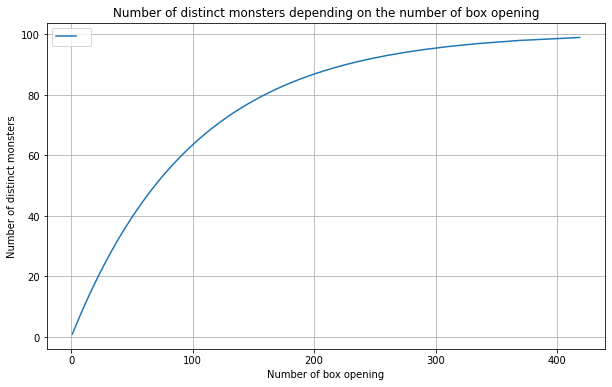

In [2]:
# Range of k values from 1 to 100
N = 100
k_values = np.arange(1, N)
# Compute the sum for each k
sum_results = [openbox_depending_on_monster_np(k) for k in k_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sum_results, k_values, label=' ')
plt.xlabel('Number of box opening')
plt.ylabel('Number of distinct monsters')
plt.title('Number of distinct monsters depending on the number of box opening')
plt.grid(True)
plt.legend()
plt.show()


## The opposite approach to the problem - a bit more complex

What if we approach the problem from the other side? <br>
How many distinct monsters do we get after opening ***N*** boxes? <br>
Well we could always look at our charts above and deduce that, but from an statistical point of view, it would look like that: <br> <br>

The probability that a monster i has not been picked after ***N*** attempts is $(\frac{99}{100})^N$ <br>
So the probability that the monster i has been picked at least once is $1-(\frac{99}{100})^N$ <br>
Given that each of the 100 monsters has the same probability of appearing, we can use the linearity of expectation to find the expected number of different monsters seen after ***N*** trials: <br>
$E(N) = 100\left(1-(\frac{99}{100})^N \right)$

In [15]:
N = 100

def monster_depending_on_openbox(k):
    total = N*(1-((N-1)/N)**k)
    return total

print("So after opening 100 boxes, we'll have on average {} different monsters".format(int(monster_depending_on_openbox(100))))

So after opening 100 boxes, we'll have on average 63 different monsters



>**So after opening 100 boxes, we'll have on average 63 different monsters**<br>

## Non uniform distribution - quite more complex

Now, what happens if the probabilities of obtaining each monster are not uniform upon opening a box?
Let's say we have 90 monsters with a probability of being found of $\frac{1}{91}$ and 10 rare monsters with a probability of being found of $\frac{1}{910}$ <br>

>How many box openings will it take to collect all 100 different monsters? <br>

Well the mathematical approach gets a bit more complicated, so we'll wander toward the world of simulation with Monte Carlo methods

### Monte Carlo methods
Monte Carlo methods are a type of computational algorithm used to solve problems through random sampling. <br>
We are going to simulate multiple series of box openings until we reach our target of unique monsters, and then we will see on average how much box opening did we need.

In [13]:
import numpy as np

# Define probabilities for each monster
probabilities = [1/91] * 90 + [1/910] * 10  
#probabilities = [1/100] * 100 #we can do that if we want to simulate with uniform distribution
probabilities = np.array(probabilities) / sum(probabilities)  # Normalize probabilities

# Number of total monsters
total_monsters = len(probabilities)

# Target number of unique monsters (we want to reach 100 of unique monsters)
target_unique_monsters = 100

# Function to simulate opening boxes until we reach the target
def simulate_boxes():
    collected_monsters = set()
    box_count = 0
    while len(collected_monsters) < target_unique_monsters:
        monster = np.random.choice(total_monsters, p=probabilities)
        collected_monsters.add(monster)
        box_count += 1
    return box_count

# Number of simulations
num_simulations = 10000
results = [simulate_boxes() for _ in range(num_simulations)]

# Calculate the average number of boxes needed
average_boxes = np.mean(results)
print("To have all 100 distinct monsters we'd need to open on average {} boxes".format(int(average_boxes)))


To have all 100 distinct monsters we'd need to open on average 2658 boxes


We can also plot the distribution of our number of box openings

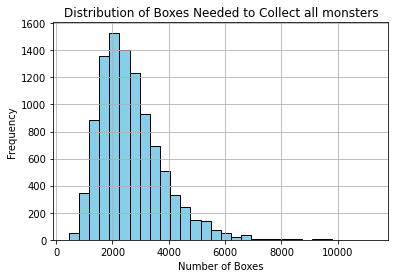

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of results from the simulations
plt.hist(results, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Boxes Needed to Collect all monsters')
plt.xlabel('Number of Boxes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Conclusion
Throughout our exploration of the Coupon Collector’s Problem, we’ve journeyed through the realms of probability, expectation, and strategy. From the basic uniform distribution scenarios where every item has an equal chance of being collected, to the more complex landscapes where rarity and unequal probabilities come into play, we’ve seen how mathematical insights can illuminate the path to completing collections efficiently.

So next time you open a pack or plan a strategy to collect something rare, remember the lessons of the Coupon Collector’s Problem. With a bit of math and a lot of persistence, you’ll find that even the most daunting collections can be completed.